<a href="https://colab.research.google.com/github/JacobGeorge761/TensorFlowGoogleColab/blob/main/NeuralNetworkMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Working with multi-class classification

When you have more that 2 classes as an option its a multi-class classification problem.

Lets build a neural network to classify different items of clothing.

In [52]:
#the data has already been set up as a training and testing set by tensorflow
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [53]:
# show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [54]:
#check the shape of a singe example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

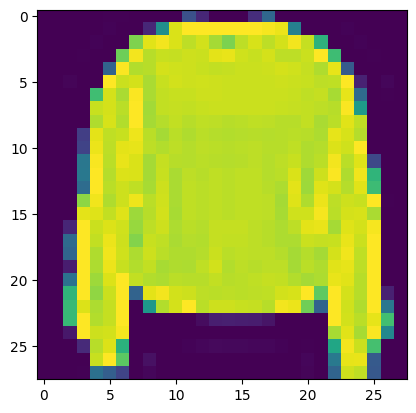

In [55]:
# plot a single sample
plt.imshow(train_data[7])

In [56]:
#check out the label
train_labels[7] #the label 2 corresponds to a "Pullover"

np.uint8(2)

In [57]:
# create a small list so we can index onto our training lables so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

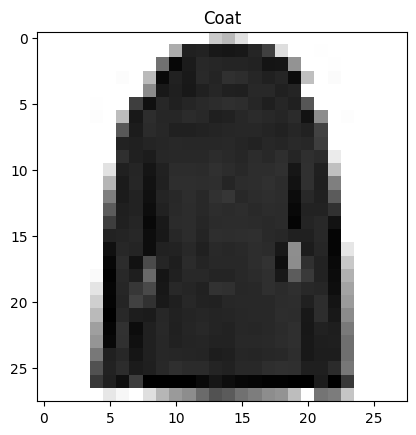

In [58]:
#ploot an example image and its label
index = 2000
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

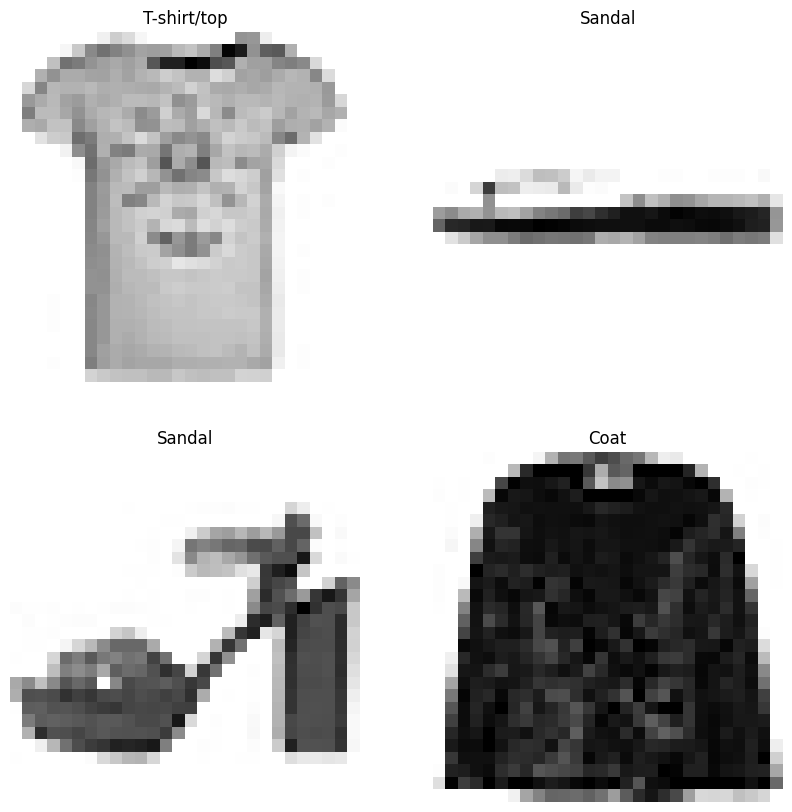

In [59]:
#plot multiple random images
import random
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a milti-class cassification model

For our milticlass model we can use a similar architecture to our binary classifier but with a few tweaks

* input shape = 28 x 28 (the shape of one image)

* output shape = 10 (one per class of clothing)

* loss function = tf.keras.losses.CategoricalCrossentropy (if labels are one hot encoded)

* loss function = tf.tf.keras.losses.SparseCategoricalCrossentropy (if labels are in integer form)

* output later activation = softmax (not sigmoid)

In [60]:
print(train_labels[:10])
print("************************************")

# if you want to use CategoricalCrossentropy instead of SparseCategoricalCrossentropy
# you need to one hot encode your train labels
print(tf.one_hot(train_labels[:10], depth=10))

[9 0 0 3 0 2 7 2 5 5]
************************************
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)


In [61]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tells the neural network we are passing some 28x28 images
    #neural networks like for things to be in one long vector so that is what Flatten does
    #it turns 28X28 into None,784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_1.compile(#loss=tf.keras.losses.CategoricalCrossentropy(),
                #this loss function expects our lables in OneHot representation so we need to use "SparreCateoricalCrossentropy"
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels)) #this data will remain unseen and we can evaluate how good our models pattern are from the training data when we use them on unseen data

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1033 - loss: 2.4652 - val_accuracy: 0.1083 - val_loss: 2.2835
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1147 - loss: 2.2725 - val_accuracy: 0.1343 - val_loss: 2.2225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1378 - loss: 2.2157 - val_accuracy: 0.2646 - val_loss: 1.9006
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2875 - loss: 1.7406 - val_accuracy: 0.3670 - val_loss: 1.5391
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3718 - loss: 1.5273 - val_accuracy: 0.4132 - val_loss: 1.4685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4019 - loss: 1.4571 - val_accuracy: 0.4381 - val_loss: 1.4066
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4435 - loss: 1.3713 - val_accuracy: 0.4505 - val_loss: 1.3450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4528 - loss: 1.3305 - 

In [62]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tells the neural network we are passing some 28x28 images
    #neural networks like for things to be in one long vector so that is what Flatten does
    #it turns 28X28 into None,784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                #this loss function expects our lables in OneHot representation so we need to use "SparreCateoricalCrossentropy"
                #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10))) #this data will remain unseen and we can evaluate how good our models pattern are from the training data when we use them on unseen data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1620 - loss: 2.4612 - val_accuracy: 0.2909 - val_loss: 1.6811
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2903 - loss: 1.6319 - val_accuracy: 0.3287 - val_loss: 1.5482
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3279 - loss: 1.5278 - val_accuracy: 0.3294 - val_loss: 1.4901
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3602 - loss: 1.4692 - val_accuracy: 0.3802 - val_loss: 1.4261
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3990 - loss: 1.4105 - val_accuracy: 0.3795 - val_loss: 1.4093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4057 - loss: 1.3775 - val_accuracy: 0.3896 - val_loss: 1.3797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4082 - loss: 1.3581 - val_accuracy: 0.3968 - val_loss: 1.3612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4099 - loss: 1.3437 - 

In [63]:
#check the model summary
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Lets review the steps of getting our data ready for a TensorFlow model

1. Turn all the data into numbers (neural networks cant handle strings)

2. Make sure all of our tensors are the right shape

3. Scale features (normalize or standardize, neural networks tend to prefer normalization)

In [64]:
# check the min and max of the train data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

Looks like our training data goes from 0 to 255. Neural networks prefer the numbers in the tensors they try to find patterns in to be between 0 and 1

In [65]:
# We can get out training train and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max of the scaled data
train_data_norm.min(), train_data_norm.max()


(np.float64(0.0), np.float64(1.0))

In [66]:
# now that our data is normalized, lets try the exact same model again with the norm data
#set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tells the neural network we are passing some 28x28 images
    #neural networks like for things to be in one long vector so that is what Flatten does
    #it turns 28X28 into None,784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                #this loss function expects our lables in OneHot representation so we need to use "SparreCateoricalCrossentropy"
                #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
norm_history = model_2.fit(train_data_norm,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))) #this data will remain unseen and we can evaluate how good our models pattern are from the training data when we use them on unseen data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4729 - loss: 1.5077 - val_accuracy: 0.7159 - val_loss: 0.8406
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7329 - loss: 0.7737 - val_accuracy: 0.7750 - val_loss: 0.6740
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7836 - loss: 0.6368 - val_accuracy: 0.7947 - val_loss: 0.6103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8001 - loss: 0.5814 - val_accuracy: 0.8034 - val_loss: 0.5794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8080 - loss: 0.5546 - val_accuracy: 0.8082 - val_loss: 0.5636
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8135 - loss: 0.5385 - val_accuracy: 0.8125 - val_loss: 0.5535
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8165 - loss: 0.5269 - val_accuracy: 0.8154 - val_loss: 0.5463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8185 - loss: 0.5180 - 

Just by normalizing the data, we have more than doubled our accuracy

<Axes: title={'center': 'Normalized data'}>

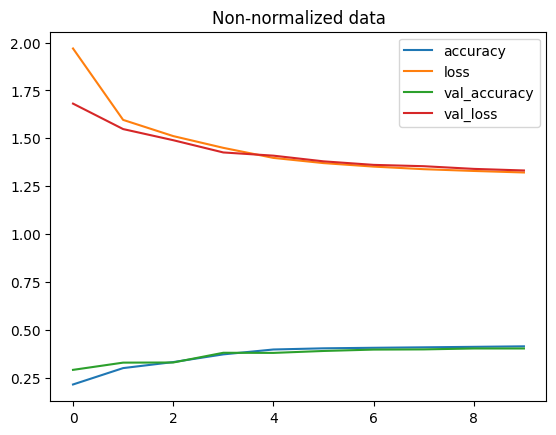

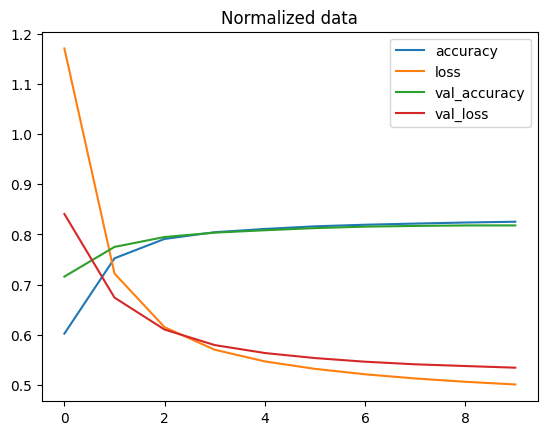

In [67]:
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

We can see how much more quicky our model learned with the normalized data

Even when comparing the same model with slightly differnt data, it is important to make sure your are comparing them on the same criteria **(i.e. same architechture but differnt data OR same data but differnt architecture)**

## Finding the ideal learning rate

(the learning rate value where the loss decreases the most)

In [68]:
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

#compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),# we need to use this since our labels are not one hot encoded
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
find_lr_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),#this data will remain unseen and we can evaluate how good our models pattern are from the training data when we use them on unseen data
                              callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3497 - loss: 1.6980 - val_accuracy: 0.5763 - val_loss: 1.1314 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5929 - loss: 1.0841 - val_accuracy: 0.6241 - val_loss: 0.9773 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6208 - loss: 0.9585 - val_accuracy: 0.6275 - val_loss: 0.9038 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6297 - loss: 0.8945 - val_accuracy: 0.6350 - val_loss: 0.8628 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6463 - loss: 0.8424 - val_accuracy: 0.7197 - val_loss: 0.7715 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7213 - loss: 0.7462 - val_accuracy: 0.7310 - val_loss: 0.7147 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7393 - l

Text(0.5, 1.0, 'Learning Rate vs Loss')

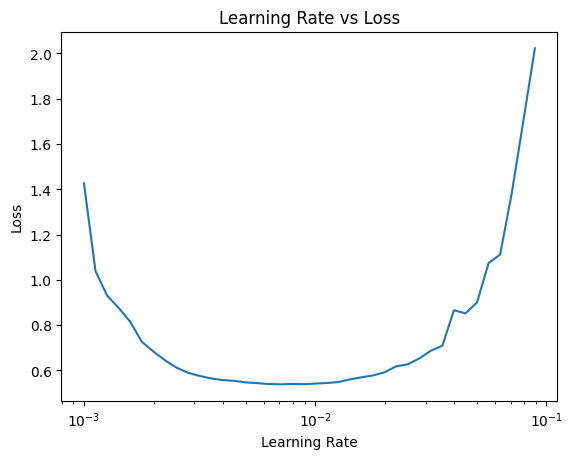

In [69]:
#lets plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [70]:
#lets refit the model with the ideal learning rate
tf.random.set_seed(42)

#create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

#compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),# we need to use this since our labels are not one hot encoded
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])


#fit the model
history_4 = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels))#this data will remain unseen and we can evaluate how good our models pattern are from the training data when we use them on unseen data

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4376 - loss: 1.5189 - val_accuracy: 0.6792 - val_loss: 0.8402
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7066 - loss: 0.7875 - val_accuracy: 0.7615 - val_loss: 0.6802
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7710 - loss: 0.6553 - val_accuracy: 0.7778 - val_loss: 0.6283
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7874 - loss: 0.6095 - val_accuracy: 0.7878 - val_loss: 0.6064
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7985 - loss: 0.5844 - val_accuracy: 0.7983 - val_loss: 0.5902
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8074 - loss: 0.5651 - val_accuracy: 0.8009 - val_loss: 0.5802
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8111 - loss: 0.5529 - val_accuracy: 0.8041 - val_loss: 0.5740
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8142 - loss: 0.5440 - 

## Evaluate our multi class model

To do our evaluation we could:

* Evaluate its performance using other classification matrics (such as confusion matrix)

* Assess some of its predictions (through visualizations)

* Improve its results (by training it for longer or changing the architecture)

* Save and export it for us in an application


Let go throught the first 2

In [71]:
def make_confusion_martix(y_true, y_preds, classes=None, figsize=(10,10)):
  #lets create the function to plot the confusion matrix
  import itertools
  from sklearn.metrics import confusion_matrix

  #create a confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  #create figure and axis
  fig, ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #set the lables to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=6)

## Always make predictions on the same kind of data you model was trained on. If it was trained on normalized data then make predictions on normalized data...

In [72]:
#make predictions with our model
y_probs = model_4.predict(test_data_norm)

#list of prediction probabilities in regards to the class
y_probs[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9.5753807e-18, 4.5153192e-31, 1.1775201e-21, 1.5420837e-17,
       4.1051705e-13, 2.7675910e-02, 2.8773896e-13, 1.2452575e-01,
       5.9408499e-06, 8.4779233e-01], dtype=float32)

In [73]:
print(class_names)
#So the model is saying this sample is MOST LIKLEY an ankle boot
class_names[tf.argmax(y_probs[0])]

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


'Ankle boot'

In [74]:
#convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Now our predictions are in the same format as our test labels

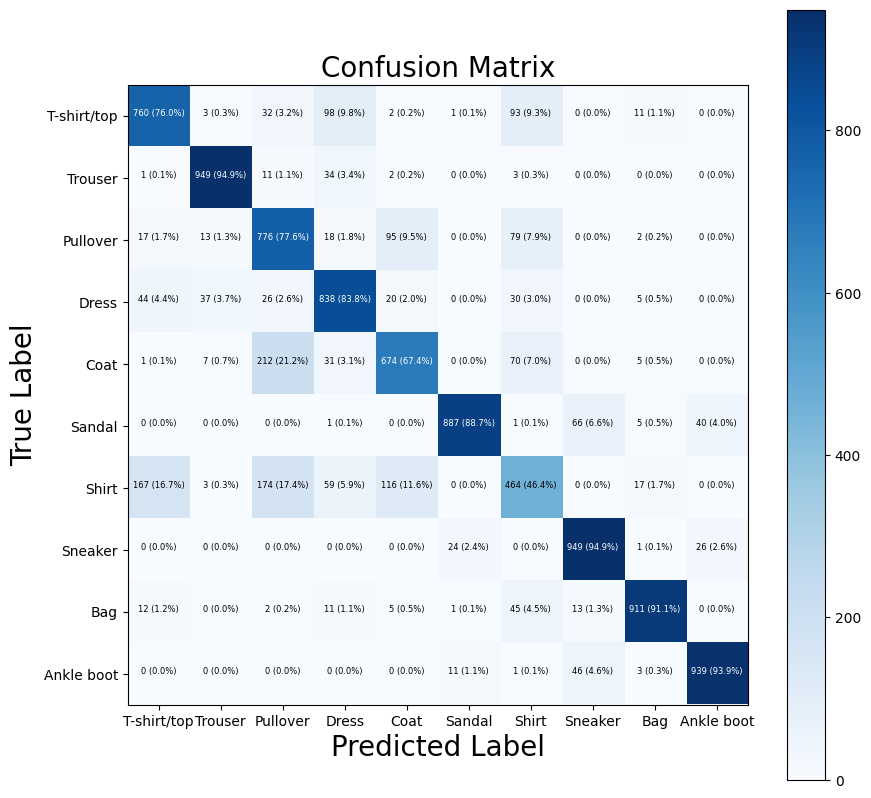

In [75]:
make_confusion_martix(test_labels, y_preds, class_names)

When working with images and other forms of visual data, it is a good idea to visualize as much as possible to develop a deeper understanding of the data and the inputs and ouputs of your models.

Lets create a function:

* Plot a random image
* Make prediction on said image
* Label the plot with the truth label and the predicted label

In [76]:
import random

def plot_random_image(model, images, true_labels, classes):
  # set up random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  # add x label info (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                                                      color=color) #set the color to green or red



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


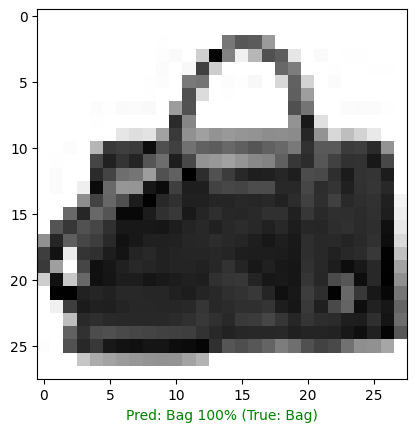

In [77]:
# check out a random image and its prediction
plot_random_image(model = model_4,
                  images = test_data_norm, #always make predictions on the same type of data the model has trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns exactly is our model learning?

In [78]:
# Find the layers of our most recent model
model_4.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [79]:
#extract a particular layer
model_4.layers[1]

<Dense name=dense_27, built=True>

In [81]:
# get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.14894511,  0.03294808,  0.73580515,  0.1423856 ],
        [ 0.02638082,  0.04985408,  0.20457315,  0.01076875],
        [ 0.6306666 , -0.34270966, -1.4902092 , -1.2940624 ],
        ...,
        [-0.17247732,  0.30220246,  0.83940613, -0.06690101],
        [ 0.35868984, -0.16489962,  0.57152236,  0.20410097],
        [-0.18551289, -0.35320985, -0.3681704 , -0.0121903 ]],
       dtype=float32),
 (784, 4))

In [82]:
28 * 28

784

In [83]:
model_4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [85]:
# now lets see the bias vector
biases, biases.shape

(array([1.6586753 , 1.7272626 , 1.7029483 , 0.72751766], dtype=float32), (4,))

A bias vector only has one value per hidden unit while a weights matrix has one value per data point.

Every neuron has a bias vector. Each one of these is paired with a weights matrix.

The weights matrix gets initialized with random numbers.

The bias vector also gets initialized as zeros (at least in the case of a tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [86]:
model_4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

For each layer in a deep learning network, the inputs of each layer come form the previous layer

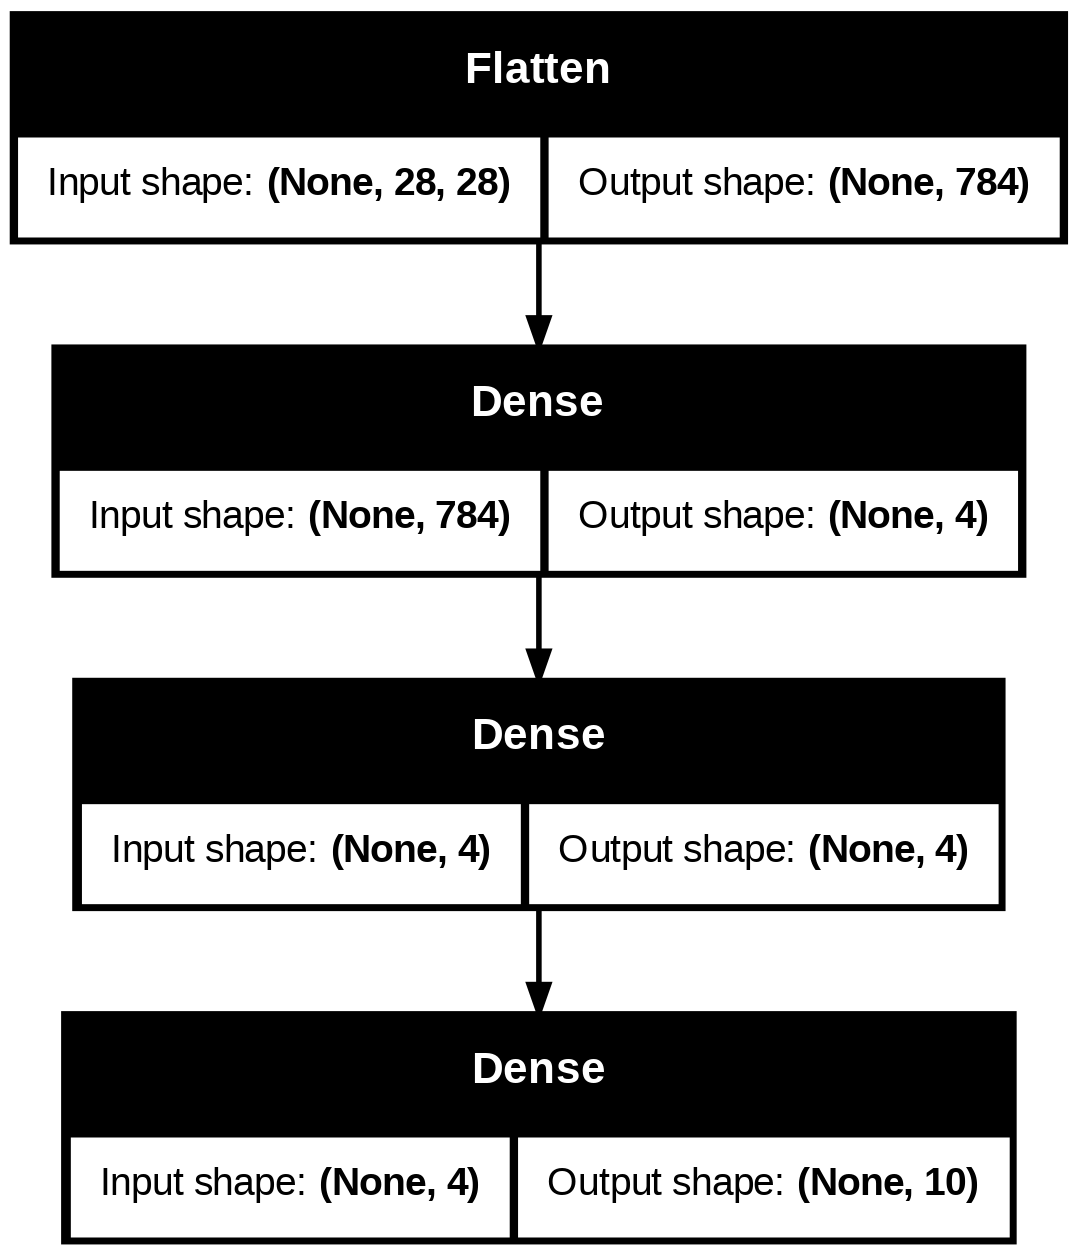

In [88]:
#lets check out a nother way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

#see the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)